In [109]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 200
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [11]:
import tensorflow as tf
import numpy as np

# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

# create graph: model
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# create graph: loss
loss = tf.reduce_mean(tf.square(y - y_data))

# bind optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# run graph
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [ 0.025] [ 0.482]
20 [ 0.06] [ 0.322]
40 [ 0.088] [ 0.307]
60 [ 0.096] [ 0.302]
80 [ 0.099] [ 0.301]
100 [ 0.1] [ 0.3]
120 [ 0.1] [ 0.3]
140 [ 0.1] [ 0.3]
160 [ 0.1] [ 0.3]
180 [ 0.1] [ 0.3]
200 [ 0.1] [ 0.3]


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [17]:
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

In [128]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

In [189]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [190]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [191]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 32)                25120     
_________________________________________________________________
activation_113 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_166 (Dense)            (None, 10)                330       
_________________________________________________________________
activation_114 (Activation)  (None, 10)                0         
Total params: 25,450.0
Trainable params: 25,450.0
Non-trainable params: 0.0
_________________________________________________________________


In [192]:
from keras.datasets import mnist
import keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [193]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [194]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.4897 - acc: 0.8680     
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 0.2425 - acc: 0.9325     
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.1993 - acc: 0.9442     
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.1728 - acc: 0.9514     
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.1519 - acc: 0.9570     
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.1378 - acc: 0.9612     
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 0.1263 - acc: 0.9636     
Epoch 8/10
60000/60000 [==============================] - 2s - loss: 0.1155 - acc: 0.9669     
Epoch 9/10
60000/60000 [==============================] - 1s - loss: 0.1071 - acc: 0.9694     
Epoch 10/10
60000/60000 [==============================] - 1s - loss: 0.0997 - acc: 0.9715     


In [197]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.120
Test Accuracy: 0.966


In [134]:
# recreating the model seems the only way to reset?
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [135]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s - loss: 0.5146 - acc: 0.8616 - val_loss: 0.2425 - val_acc: 0.9322
Epoch 2/10
54000/54000 [==============================] - 1s - loss: 0.2618 - acc: 0.9266 - val_loss: 0.1934 - val_acc: 0.9442
Epoch 3/10
54000/54000 [==============================] - 1s - loss: 0.2161 - acc: 0.9397 - val_loss: 0.1717 - val_acc: 0.9537
Epoch 4/10
54000/54000 [==============================] - 1s - loss: 0.1879 - acc: 0.9470 - val_loss: 0.1519 - val_acc: 0.9570
Epoch 5/10
54000/54000 [==============================] - 1s - loss: 0.1676 - acc: 0.9528 - val_loss: 0.1440 - val_acc: 0.9603
Epoch 6/10
54000/54000 [==============================] - 1s - loss: 0.1506 - acc: 0.9566 - val_loss: 0.1296 - val_acc: 0.9638
Epoch 7/10
54000/54000 [==============================] - 1s - loss: 0.1378 - acc: 0.9603 - val_loss: 0.1281 - val_acc: 0.9627
Epoch 8/10
54000/54000 [==============================] - 1s -

In [136]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=100, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 2s - loss: 0.5326 - acc: 0.8579 - val_loss: 0.2436 - val_acc: 0.9325
Epoch 2/100
54000/54000 [==============================] - 1s - loss: 0.2685 - acc: 0.9243 - val_loss: 0.1953 - val_acc: 0.9465
Epoch 3/100
54000/54000 [==============================] - 1s - loss: 0.2248 - acc: 0.9368 - val_loss: 0.1723 - val_acc: 0.9533
Epoch 4/100
54000/54000 [==============================] - 1s - loss: 0.1972 - acc: 0.9435 - val_loss: 0.1582 - val_acc: 0.9567
Epoch 5/100
54000/54000 [==============================] - 1s - loss: 0.1761 - acc: 0.9491 - val_loss: 0.1478 - val_acc: 0.9618
Epoch 6/100
54000/54000 [==============================] - 1s - loss: 0.1594 - acc: 0.9537 - val_loss: 0.1394 - val_acc: 0.9625
Epoch 7/100
54000/54000 [==============================] - 1s - loss: 0.1449 - acc: 0.9578 - val_loss: 0.1264 - val_acc: 0.9645
Epoch 8/100
54000/54000 [==============================

In [164]:
def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("loss")

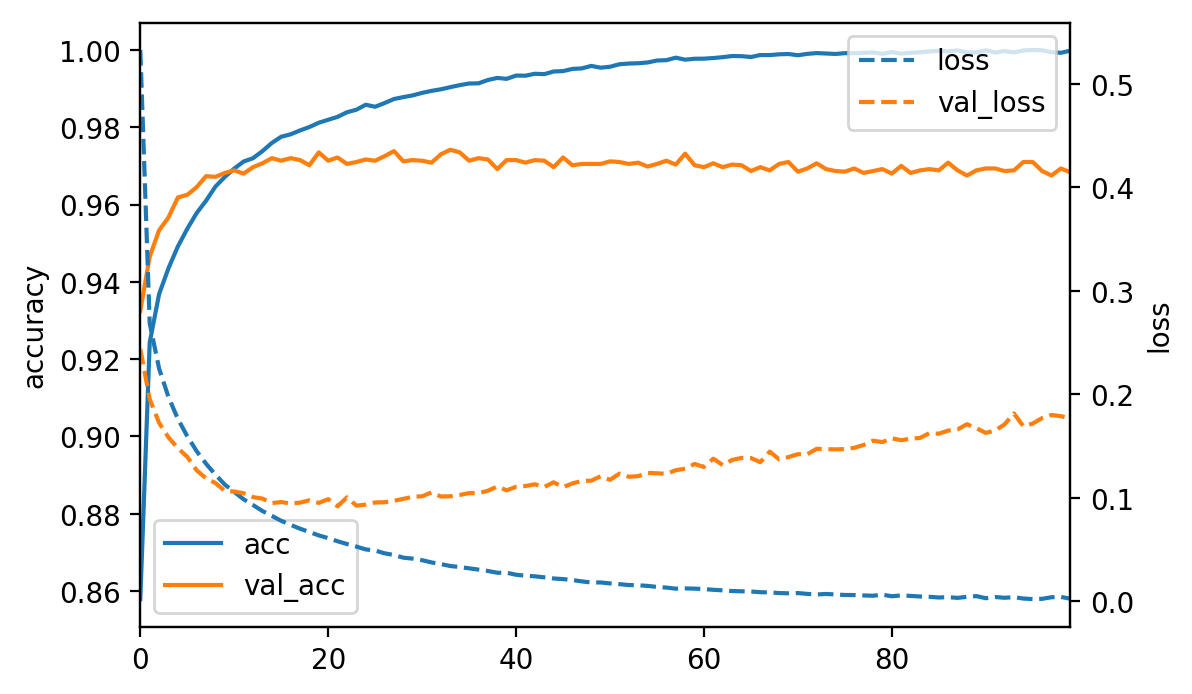

In [144]:
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

def make_model(optimizer="adam", hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_shape=(784,)),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)

param_grid = {'epochs': [1, 5, 10],  # epochs is fit parameter, not in make_model!
              'hidden_size': [32, 64, 256]}

grid = GridSearchCV(clf, param_grid=param_grid, cv=5)

In [29]:
grid.fit(X_train, y_train)

Epoch 1/1
48000/48000 [==============================] - 3s - loss: 0.3930 - acc: 0.8900     
Epoch 2/5
48000/48000 [==============================] - 2s - loss: 0.2084 - acc: 0.9402     
Epoch 3/5
48000/48000 [==============================] - 3s - loss: 0.1641 - acc: 0.9524     
Epoch 4/5
48000/48000 [==============================] - 2s - loss: 0.1367 - acc: 0.9606     
Epoch 5/5
48000/48000 [==============================] - 4s - loss: 0.3337 - acc: 0.9059     
Epoch 2/5
48000/48000 [==============================] - 4s - loss: 0.1606 - acc: 0.9522     
Epoch 3/5
48000/48000 [==============================] - 3s - loss: 0.1179 - acc: 0.9648     
Epoch 4/5
48000/48000 [==============================] - 3s - loss: 0.0930 - acc: 0.9722     
Epoch 5/5
48000/48000 [==============================] - 8s - loss: 0.2480 - acc: 0.9289     
Epoch 2/5
48000/48000 [==============================] - 8s - loss: 0.1040 - acc: 0.9691     
Epoch 3/5
48000/48000 [==============================] - 8s 

GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6ffea94160>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_epochs", "param_hidden_size"],
                values=['mean_train_score', "mean_test_score"])

mean_test_score  mean_train_score
param_epochs param_hidden_size                                   
1            32                        0.930017          0.935350
             64                        0.941433          0.948358
             256                       0.959117          0.966929
5            32                        0.956417          0.969746
             64                        0.967317          0.983113
             256                       0.973900          0.992196
10           32                        0.960100          0.979671
             64                        0.968617          0.992025
             256                       0.975050          0.996396

In [165]:

model = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128,
                    epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 32s - loss: 0.2006 - acc: 0.9386 - val_loss: 0.1042 - val_acc: 0.9710
Epoch 2/20
54000/54000 [==============================] - 30s - loss: 0.0740 - acc: 0.9766 - val_loss: 0.0729 - val_acc: 0.9777
Epoch 3/20
54000/54000 [==============================] - 32s - loss: 0.0470 - acc: 0.9846 - val_loss: 0.0808 - val_acc: 0.9765
Epoch 4/20
54000/54000 [==============================] - 32s - loss: 0.0357 - acc: 0.9886 - val_loss: 0.0810 - val_acc: 0.9785
Epoch 5/20
54000/54000 [==============================] - 34s - loss: 0.0273 - acc: 0.9911 - val_loss: 0.0740 - val_acc: 0.9798
Epoch 6/20
54000/54000 [==============================] - 35s - loss: 0.0216 - acc: 0.9932 - val_loss: 0.0888 - val_acc: 0.9773
Epoch 7/20
54000/54000 [==============================] - 31s - loss: 0.0212 - acc: 0.9931 - val_loss: 0.0836 - val_acc: 0.9790
Epoch 8/20
54000/54000 [==============================]

In [186]:
score = model.evaluate(X_test, y_test, verbose=0)

In [187]:
score

[0.099523187893343537, 0.9819]

In [179]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_157 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_158 (Dense)            (None, 10)                10250     
Total params: 1,863,690.0
Trainable params: 1,863,690
Non-trainable params: 0.0
_________________________________________________________________


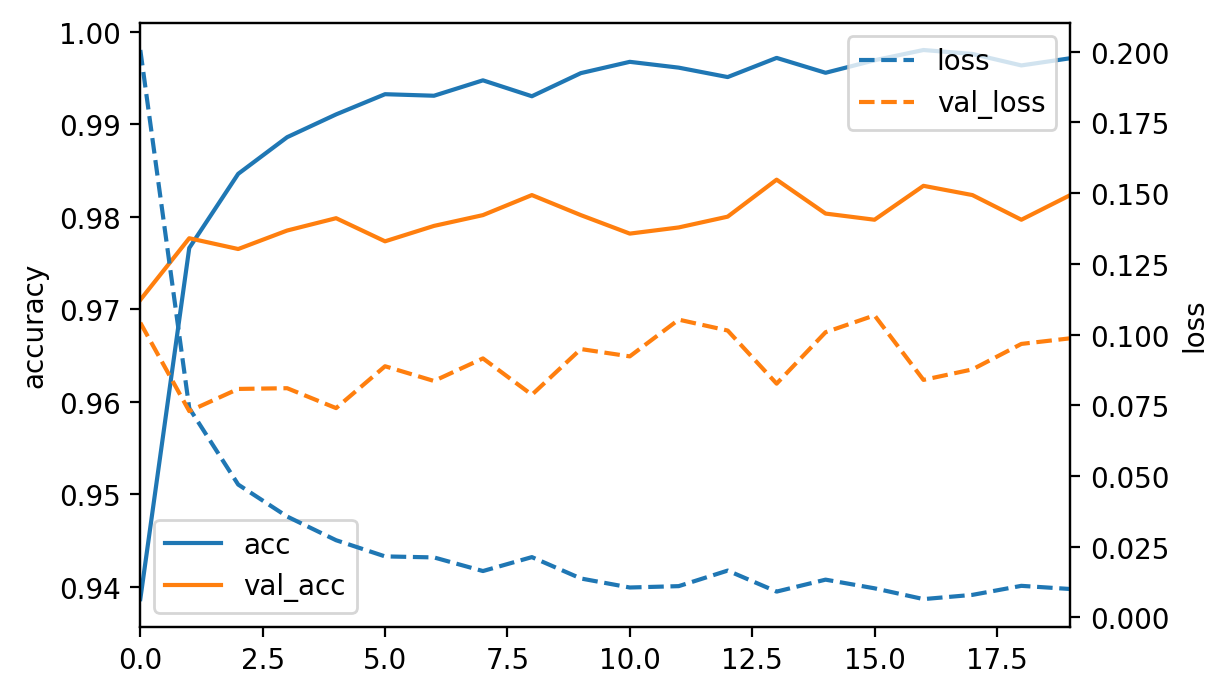

In [178]:
df = pd.DataFrame(history.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [163]:
from keras.layers import Dropout

model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5),
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(10, activation='softmax'),
])
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128,
                            epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 34s - loss: 0.2924 - acc: 0.9100 - val_loss: 0.0991 - val_acc: 0.9723
Epoch 2/20
54000/54000 [==============================] - 31s - loss: 0.1420 - acc: 0.9554 - val_loss: 0.0782 - val_acc: 0.9762
Epoch 3/20
54000/54000 [==============================] - 29s - loss: 0.1098 - acc: 0.9657 - val_loss: 0.0699 - val_acc: 0.9792
Epoch 4/20
54000/54000 [==============================] - 30s - loss: 0.0963 - acc: 0.9694 - val_loss: 0.0655 - val_acc: 0.9802
Epoch 5/20
54000/54000 [==============================] - 30s - loss: 0.0849 - acc: 0.9736 - val_loss: 0.0628 - val_acc: 0.9802
Epoch 6/20
54000/54000 [==============================] - 29s - loss: 0.0722 - acc: 0.9776 - val_loss: 0.0617 - val_acc: 0.9823
Epoch 7/20
54000/54000 [==============================] - 29s - loss: 0.0707 - acc: 0.9771 - val_loss: 0.0636 - val_acc: 0.9820
Epoch 8/20
54000/54000 [==============================]

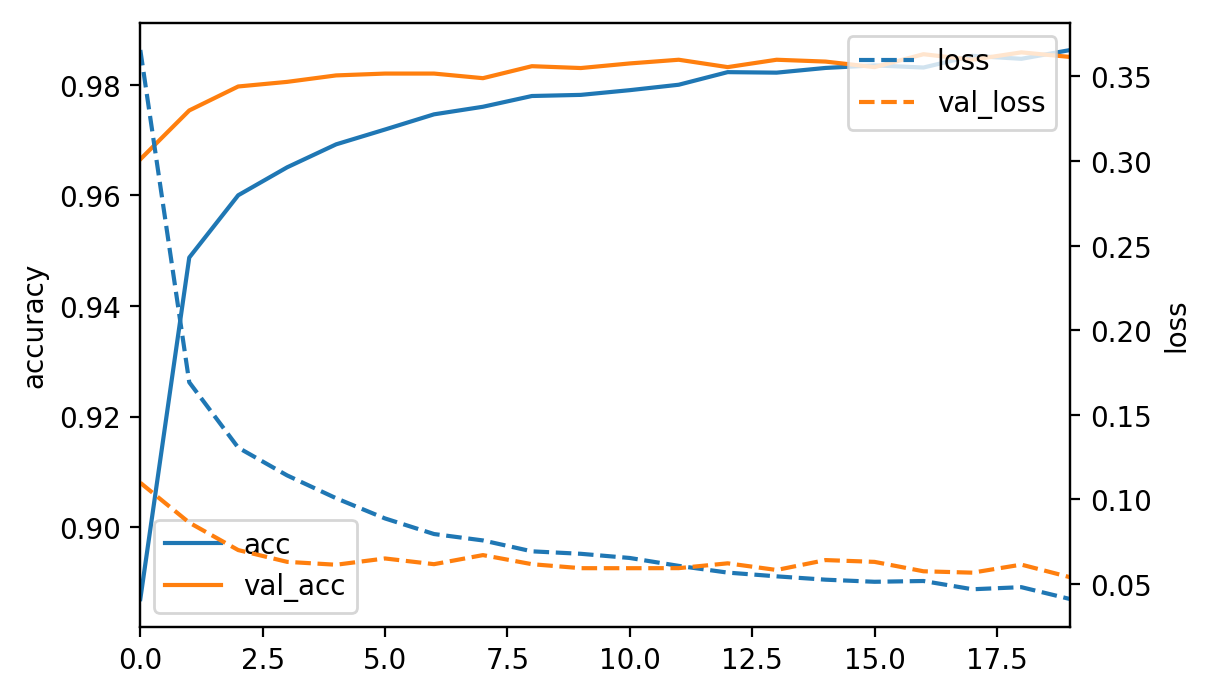

In [152]:
df = pd.DataFrame(history_dropout.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [166]:
score = model.evaluate(X_test, y_test, verbose=0)

In [167]:
score

[0.099523187893343537, 0.9819]

# Batch Normalization

In [198]:
from keras.layers import BatchNormalization

model_bn = Sequential([
    Dense(512, input_shape=(784,)),
    BatchNormalization(),
    Activation("relu"),
    Dense(512),
    BatchNormalization(),
    Activation("relu"),
    Dense(10, activation='softmax'),
])
model_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_bn = model.fit(X_train, y_train, batch_size=128,
                    epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s - loss: 0.0955 - acc: 0.9725 - val_loss: 0.0776 - val_acc: 0.9795
Epoch 2/10
54000/54000 [==============================] - 1s - loss: 0.0895 - acc: 0.9737 - val_loss: 0.0789 - val_acc: 0.9772
Epoch 3/10
54000/54000 [==============================] - 1s - loss: 0.0844 - acc: 0.9752 - val_loss: 0.0775 - val_acc: 0.9772
Epoch 4/10
54000/54000 [==============================] - 1s - loss: 0.0798 - acc: 0.9770 - val_loss: 0.0778 - val_acc: 0.9775
Epoch 5/10
54000/54000 [==============================] - 1s - loss: 0.0764 - acc: 0.9780 - val_loss: 0.0792 - val_acc: 0.9773
Epoch 6/10
54000/54000 [==============================] - 1s - loss: 0.0723 - acc: 0.9786 - val_loss: 0.0865 - val_acc: 0.9763
Epoch 7/10
54000/54000 [==============================] - 1s - loss: 0.0690 - acc: 0.9801 - val_loss: 0.0825 - val_acc: 0.9758
Epoch 8/10
54000/54000 [==============================] - 1s -

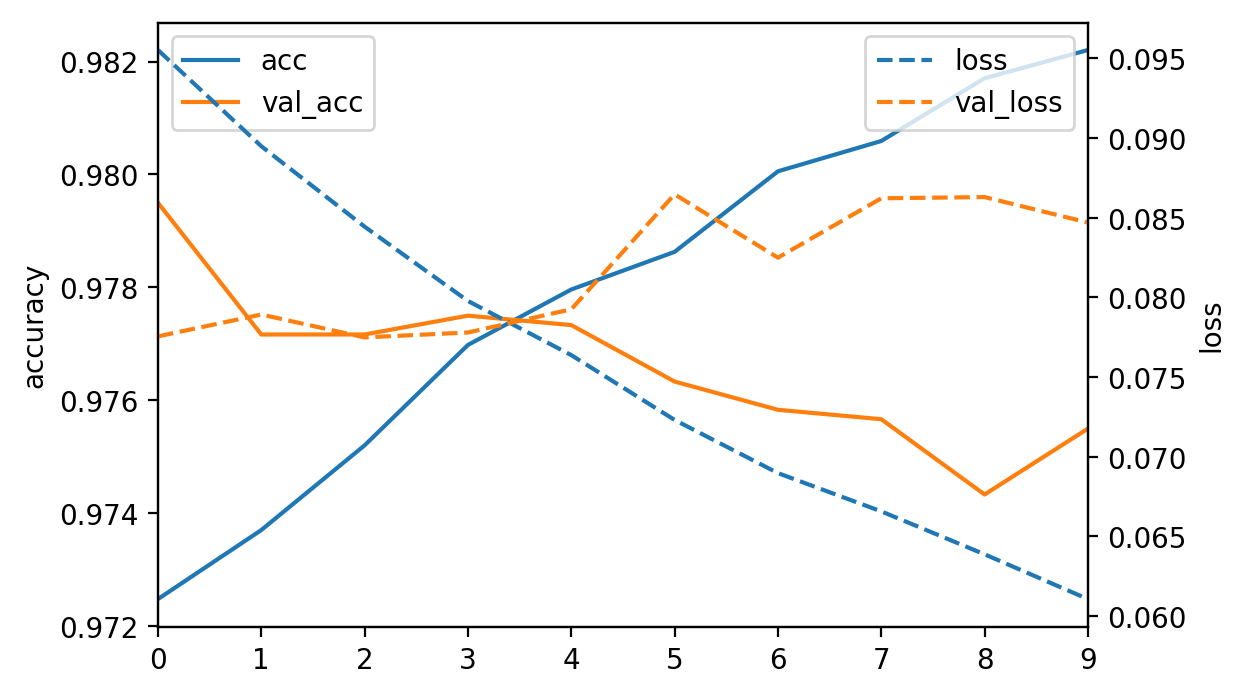

In [199]:
plot_history(history)

# Convolutions

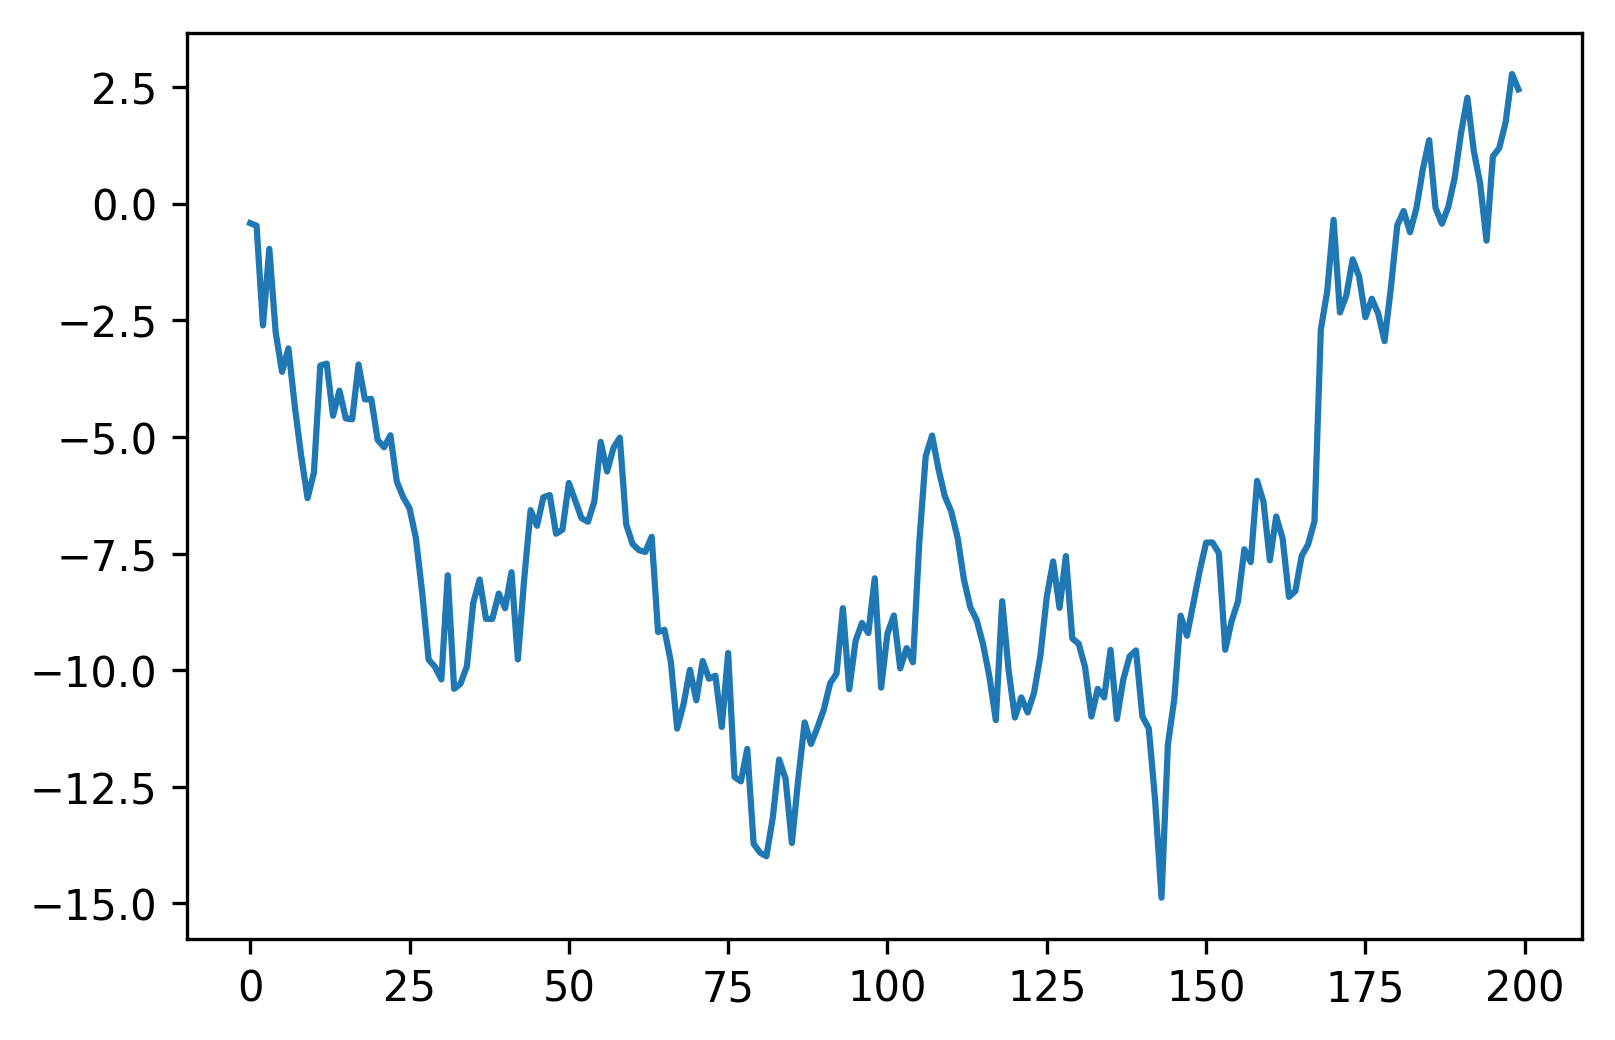

In [61]:
from scipy.ndimage import convolve
rng = np.random.RandomState(2)
signal = np.cumsum(rng.normal(size=200))
plt.plot(signal)

array([ 0.003,  0.009,  0.021,  0.044,  0.077,  0.117,  0.149,  0.162,
        0.149,  0.117,  0.077,  0.044,  0.021,  0.009,  0.003])

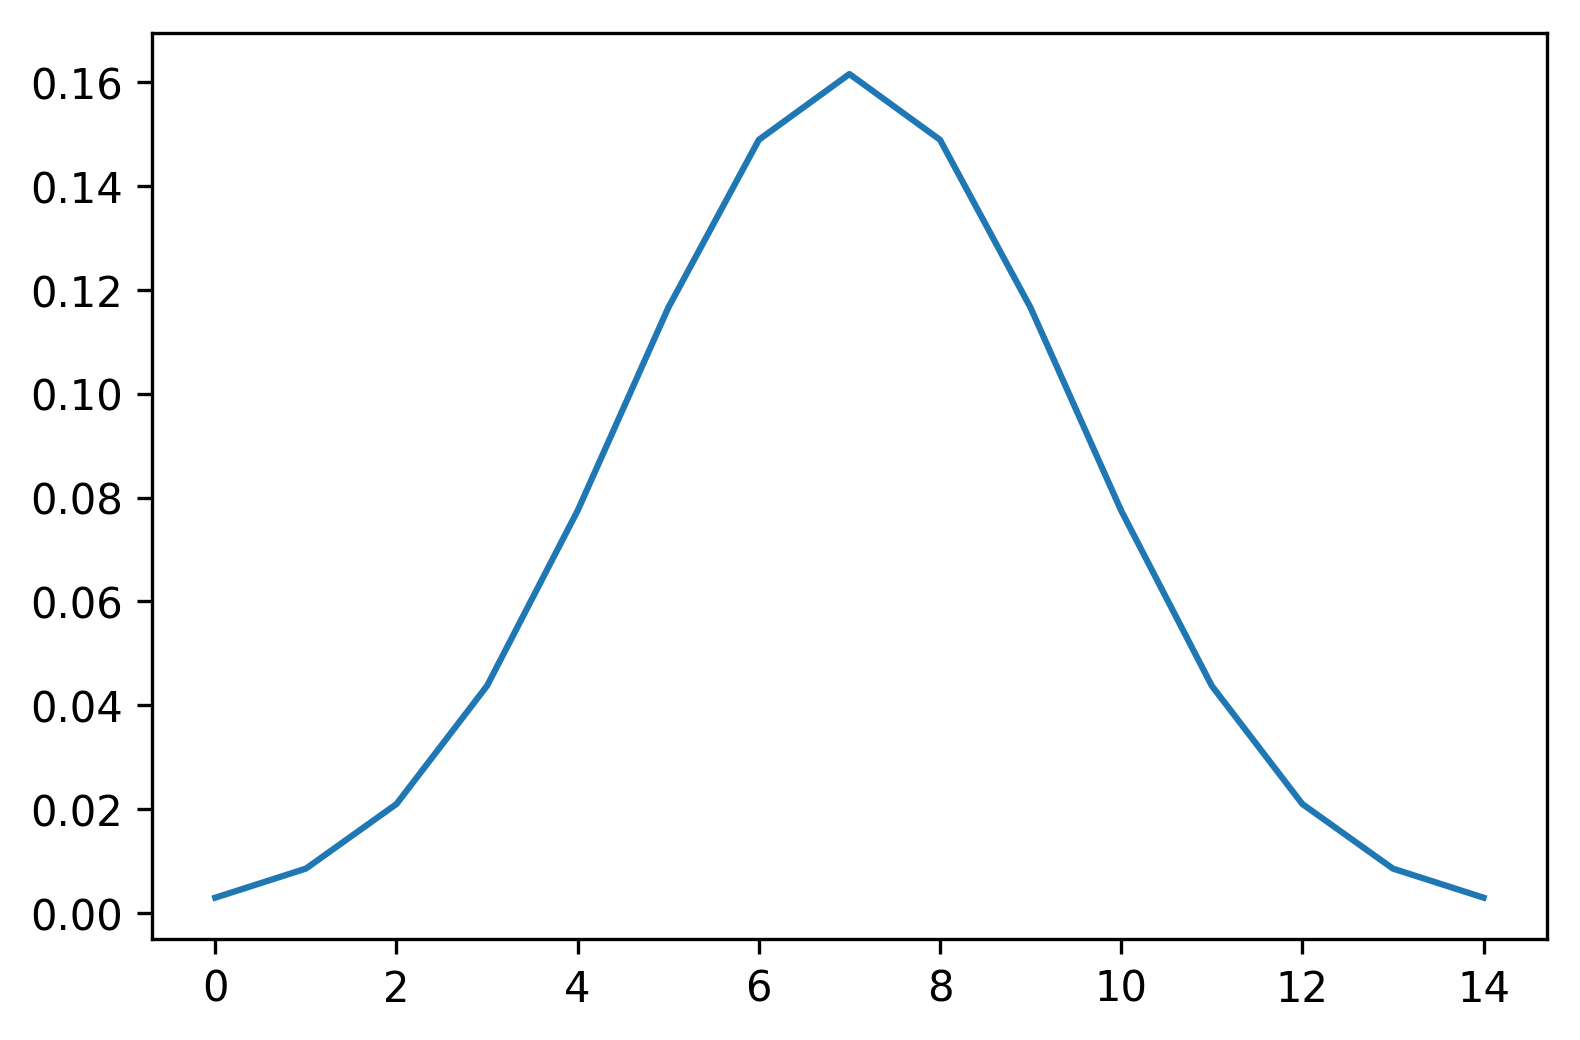

In [100]:
gaussian_filter = np.exp(-np.linspace(-2, 2, 15) ** 2)
gaussian_filter /= gaussian_filter.sum()
plt.plot(gaussian_filter)
gaussian_filter

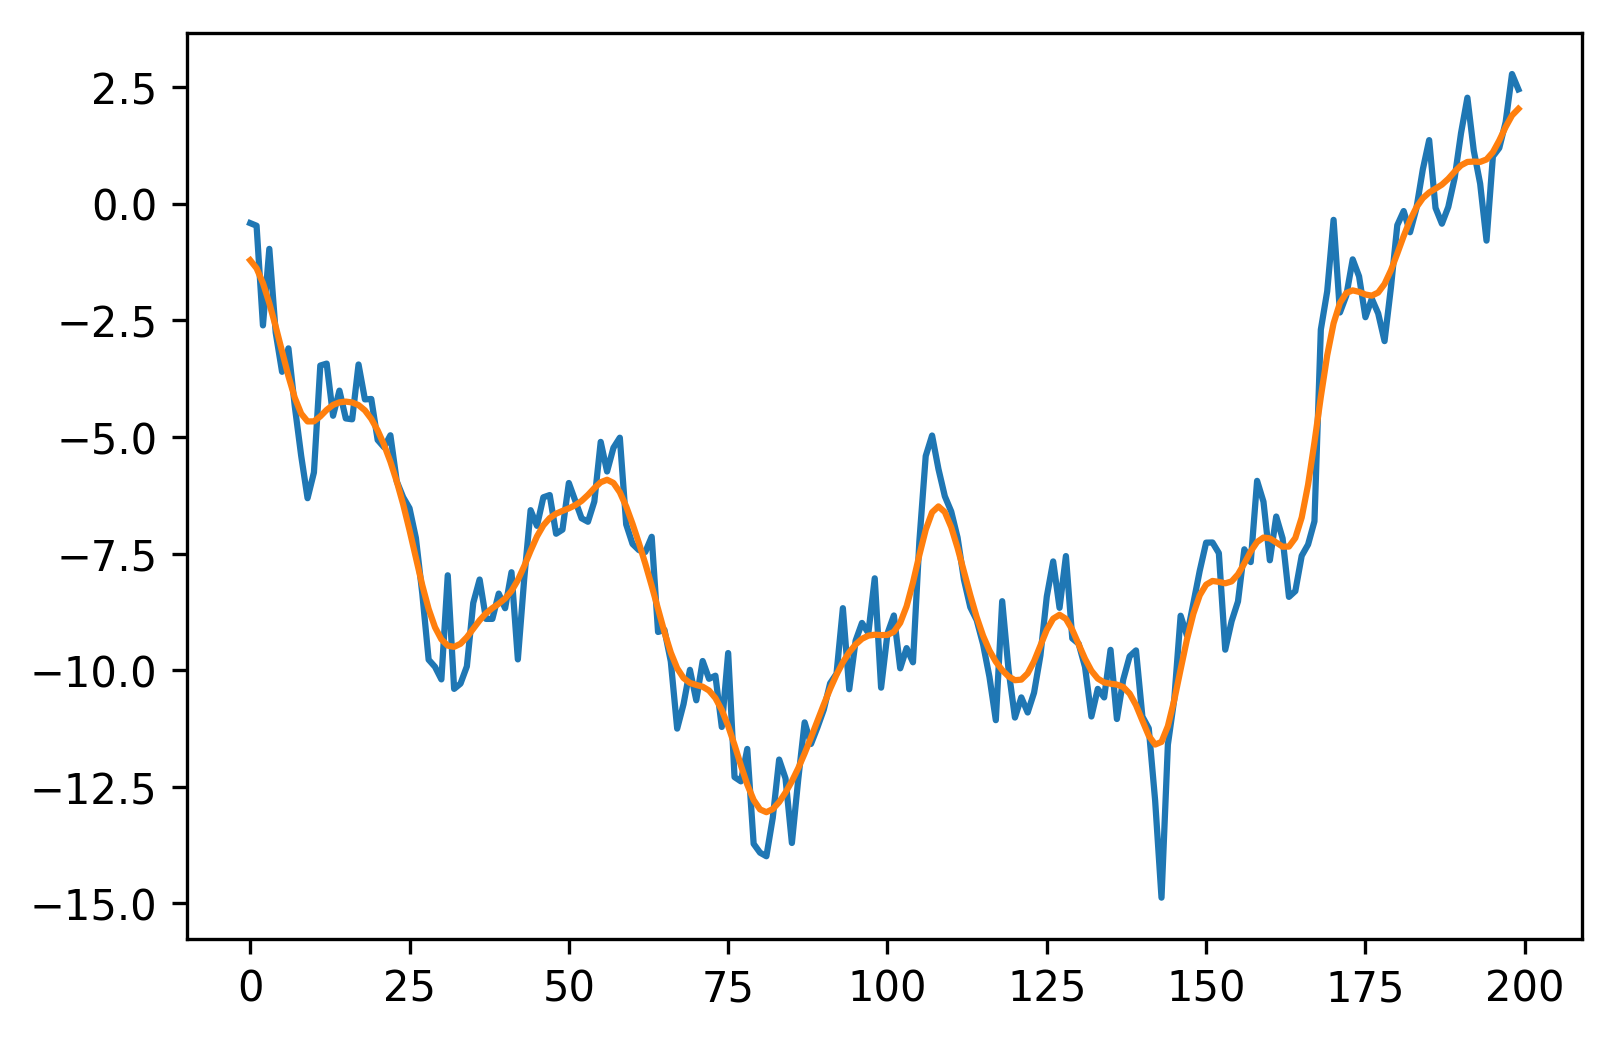

In [101]:
plt.plot(signal)
plt.plot(convolve(signal, gaussian_filter))

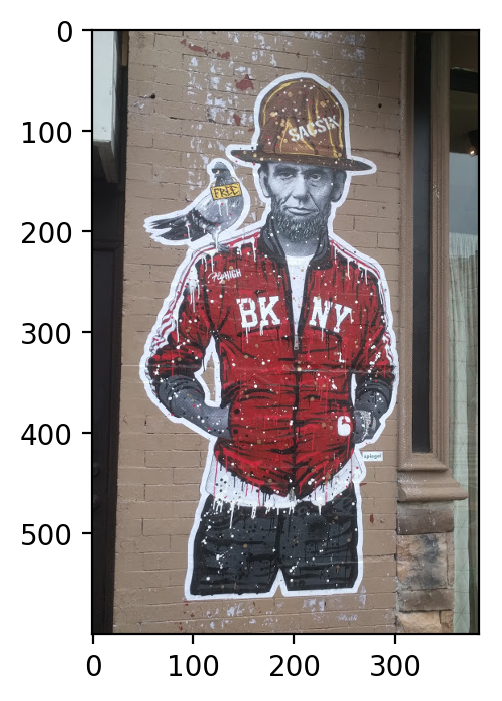

In [110]:
from scipy.misc import imread
image = imread("IMG_20170207_090931.jpg")
plt.imshow(image)

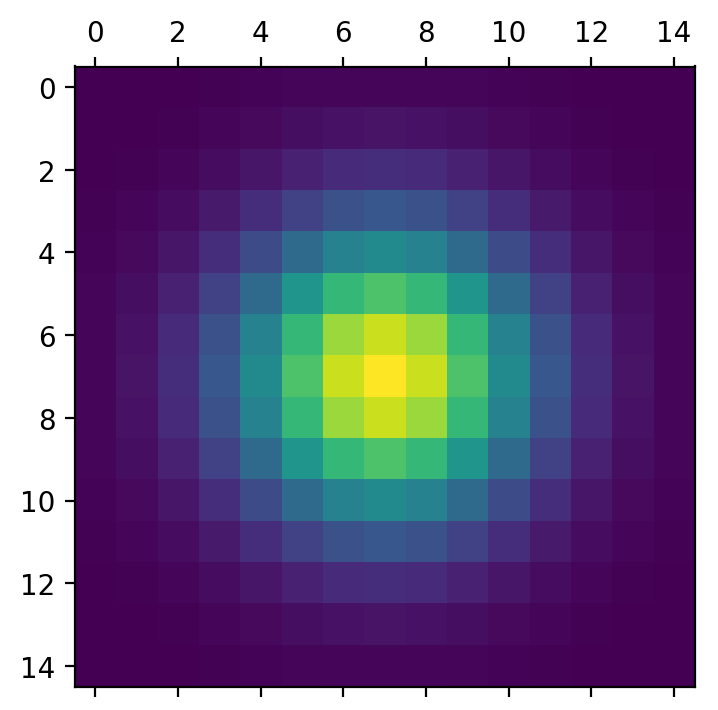

In [111]:
gaussian_2d = gaussian_filter * gaussian_filter[:, np.newaxis]
plt.matshow(gaussian_2d)

In [107]:
out = convolve(image, gaussian_2d[:, :, np.newaxis])

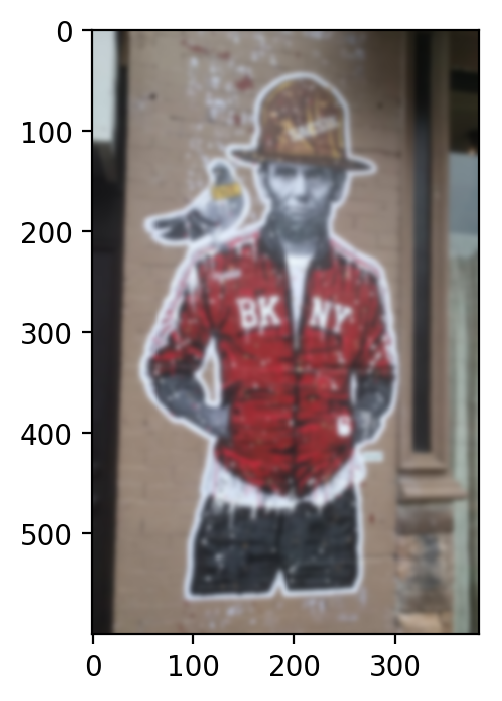

In [112]:
plt.imshow(out)

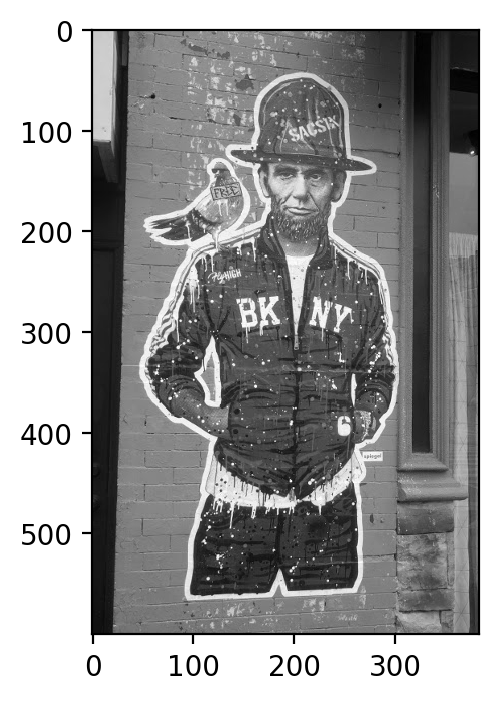

In [118]:
gray_image = image.mean(axis=2)
plt.imshow(gray_image, cmap="gray")

In [125]:
gradient_2d = convolve(gaussian_2d, [[-1, 1]])

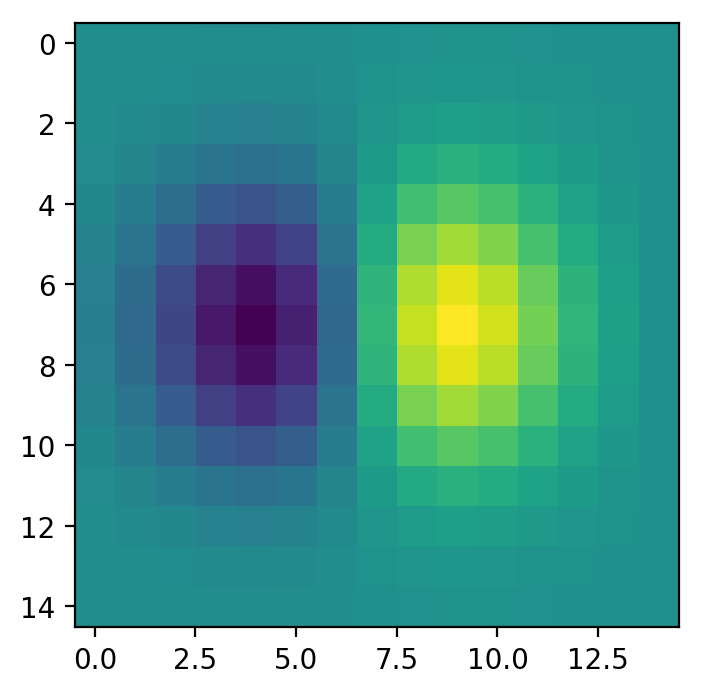

In [126]:
plt.imshow(gradient_2d)

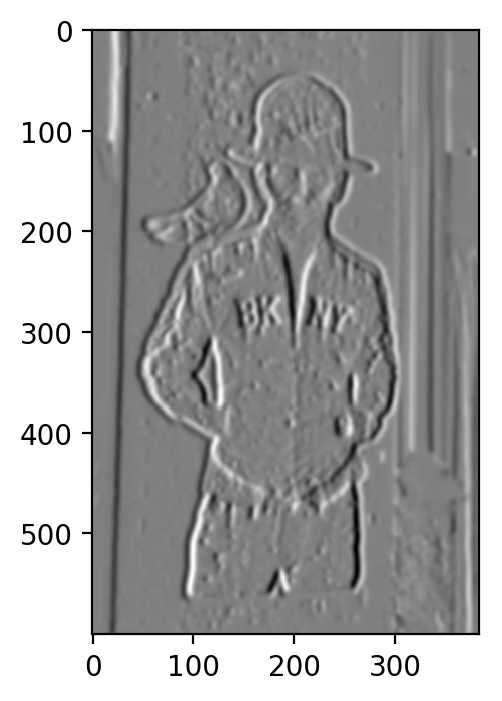

In [127]:
edges = convolve(gray_image, gradient_2d)
plt.imshow(edges, cmap="gray")

# CNN

In [174]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


X_train_images = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
X_test_images = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [175]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

num_classes = 10
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

In [177]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_163 (Dense)            (None, 64)                51264     
_________________________________________________________________
dense_164 (Dense)            (None, 10)                650       
Total para

In [176]:
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn = cnn.fit(X_train_images, y_train,
                      batch_size=128, epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 43s - loss: 9.0900 - acc: 0.4085 - val_loss: 0.2359 - val_acc: 0.9280
Epoch 2/20
54000/54000 [==============================] - 46s - loss: 0.1478 - acc: 0.9561 - val_loss: 0.0864 - val_acc: 0.9762
Epoch 3/20
54000/54000 [==============================] - 48s - loss: 0.0696 - acc: 0.9785 - val_loss: 0.0688 - val_acc: 0.9795
Epoch 4/20
54000/54000 [==============================] - 40s - loss: 0.0459 - acc: 0.9849 - val_loss: 0.0577 - val_acc: 0.9838
Epoch 5/20
54000/54000 [==============================] - 41s - loss: 0.0338 - acc: 0.9892 - val_loss: 0.0613 - val_acc: 0.9847
Epoch 6/20
54000/54000 [==============================] - 48s - loss: 0.0277 - acc: 0.9910 - val_loss: 0.0590 - val_acc: 0.9853
Epoch 7/20
54000/54000 [==============================] - 48s - loss: 0.0209 - acc: 0.9931 - val_loss: 0.0533 - val_acc: 0.9865
Epoch 8/20
54000/54000 [==============================]

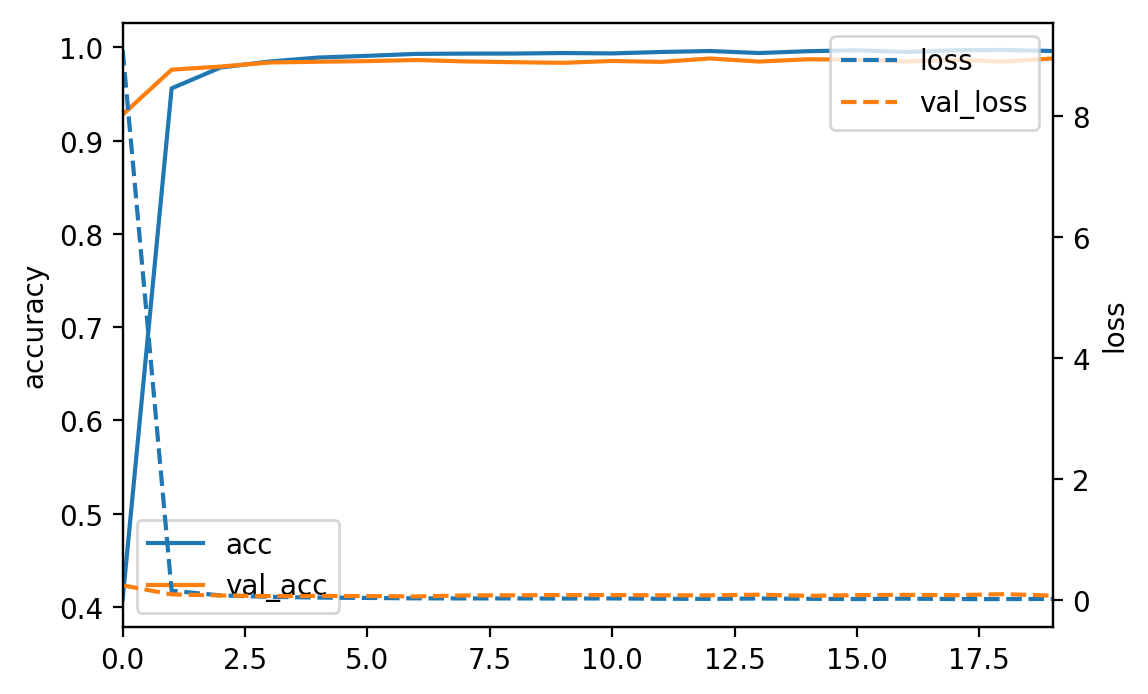

In [188]:
plot_history(history_cnn)

In [200]:
cnn.evaluate(X_test_images, y_test)

 9952/10000 [============================>.] - ETA: 0s

[0.089020583277629253, 0.98429999999999995]

(0.9, 1)

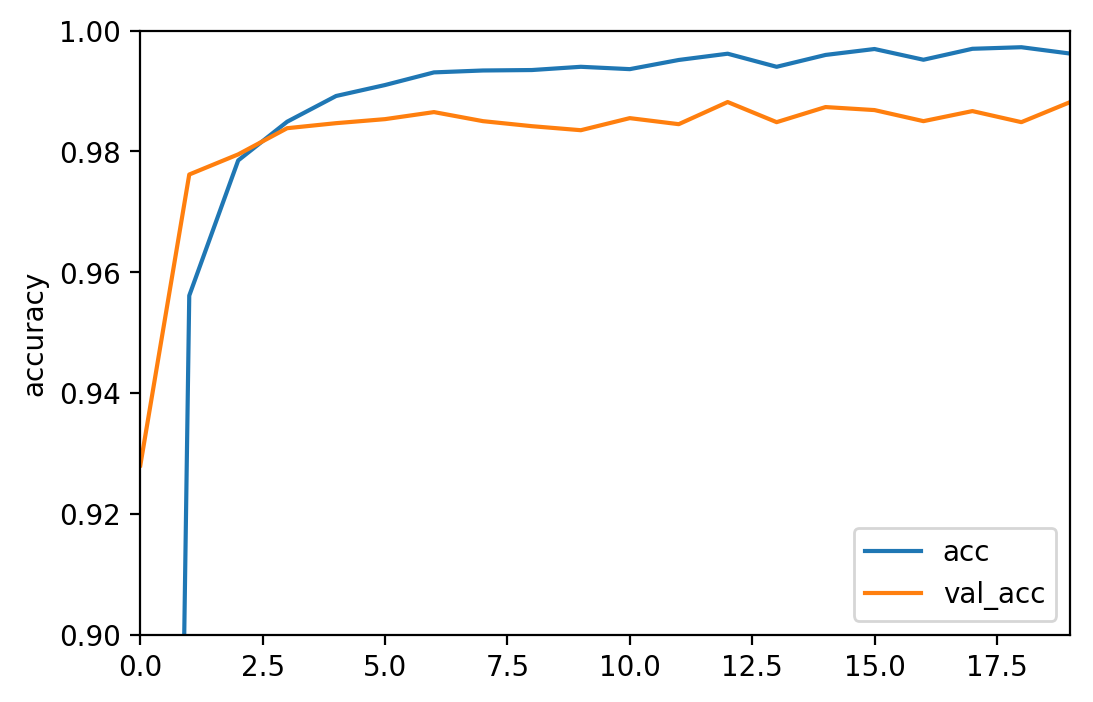

In [202]:
df = pd.DataFrame(history_cnn.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
plt.ylim(.9, 1)